### Data Preprocessing for the Decision Tree based model

In [165]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder

##### 1. Loading and Exploring raw data.

In [166]:
#Function to print the dimension of the dataset
def dimensions(df: pd.DataFrame):
    print("=======Dimensions of the Dataset=======")
    shape = df.shape
    print(f"Rows: {shape[0]}")
    print(f"Columns: {shape[1]}\n")

In [167]:
#Loading and Inspecting data

file_path = os.path.join(os.getcwd(), "Data", "raw", "student_depression_dataset.csv")
raw = pd.read_csv(file_path)

print(f"   Information of the raw dataset \n ===================================\n")
raw.info()

   Information of the raw dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                    

In [168]:
raw.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [169]:
dimensions(raw) 

=======Dimensions of the Dataset=======
Rows: 27901
Columns: 18



In [170]:
raw.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [171]:
raw.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [172]:
raw.loc[raw.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [173]:
raw.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)

##### 2. Droping irrelavent columns - Part 1.

In [174]:
processed = raw.drop(columns=["id"]) 
processed.head()

#column "id" is dropped because it's a unique value

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [175]:
#processed["Sleep Duration"] = processed["Sleep Duration"].str.replace("'","").str.strip()

processed = processed.apply(
    lambda col: col.str.replace("'", "").str.strip() if col.dtypes == 'object' else col
)

processed.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


##### 3. Exploratory Data Analysis (EDA).

Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64


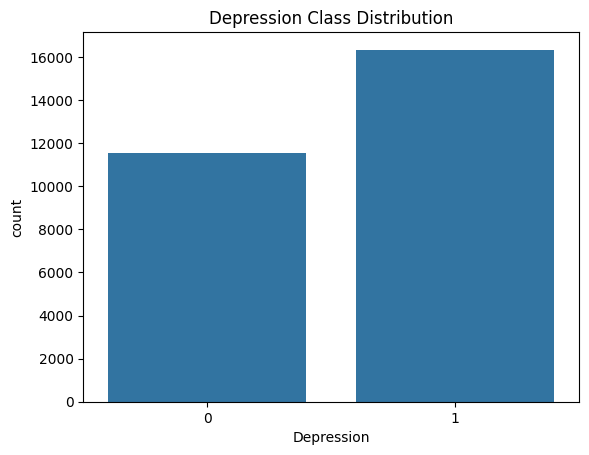

In [176]:
print(processed['Depression'].value_counts(normalize=True))

sns.countplot(x='Depression', data=processed)
plt.title('Depression Class Distribution')
plt.show()


##### 3.1. Visualizing Ctegorical Features.

In [177]:
categorical_features = [x for x in processed.columns if processed[x].dtype =='object']

In [178]:
categorical_features

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Suicidal Thoughts',
 'Financial Stress',
 'Family History of Mental Illness']

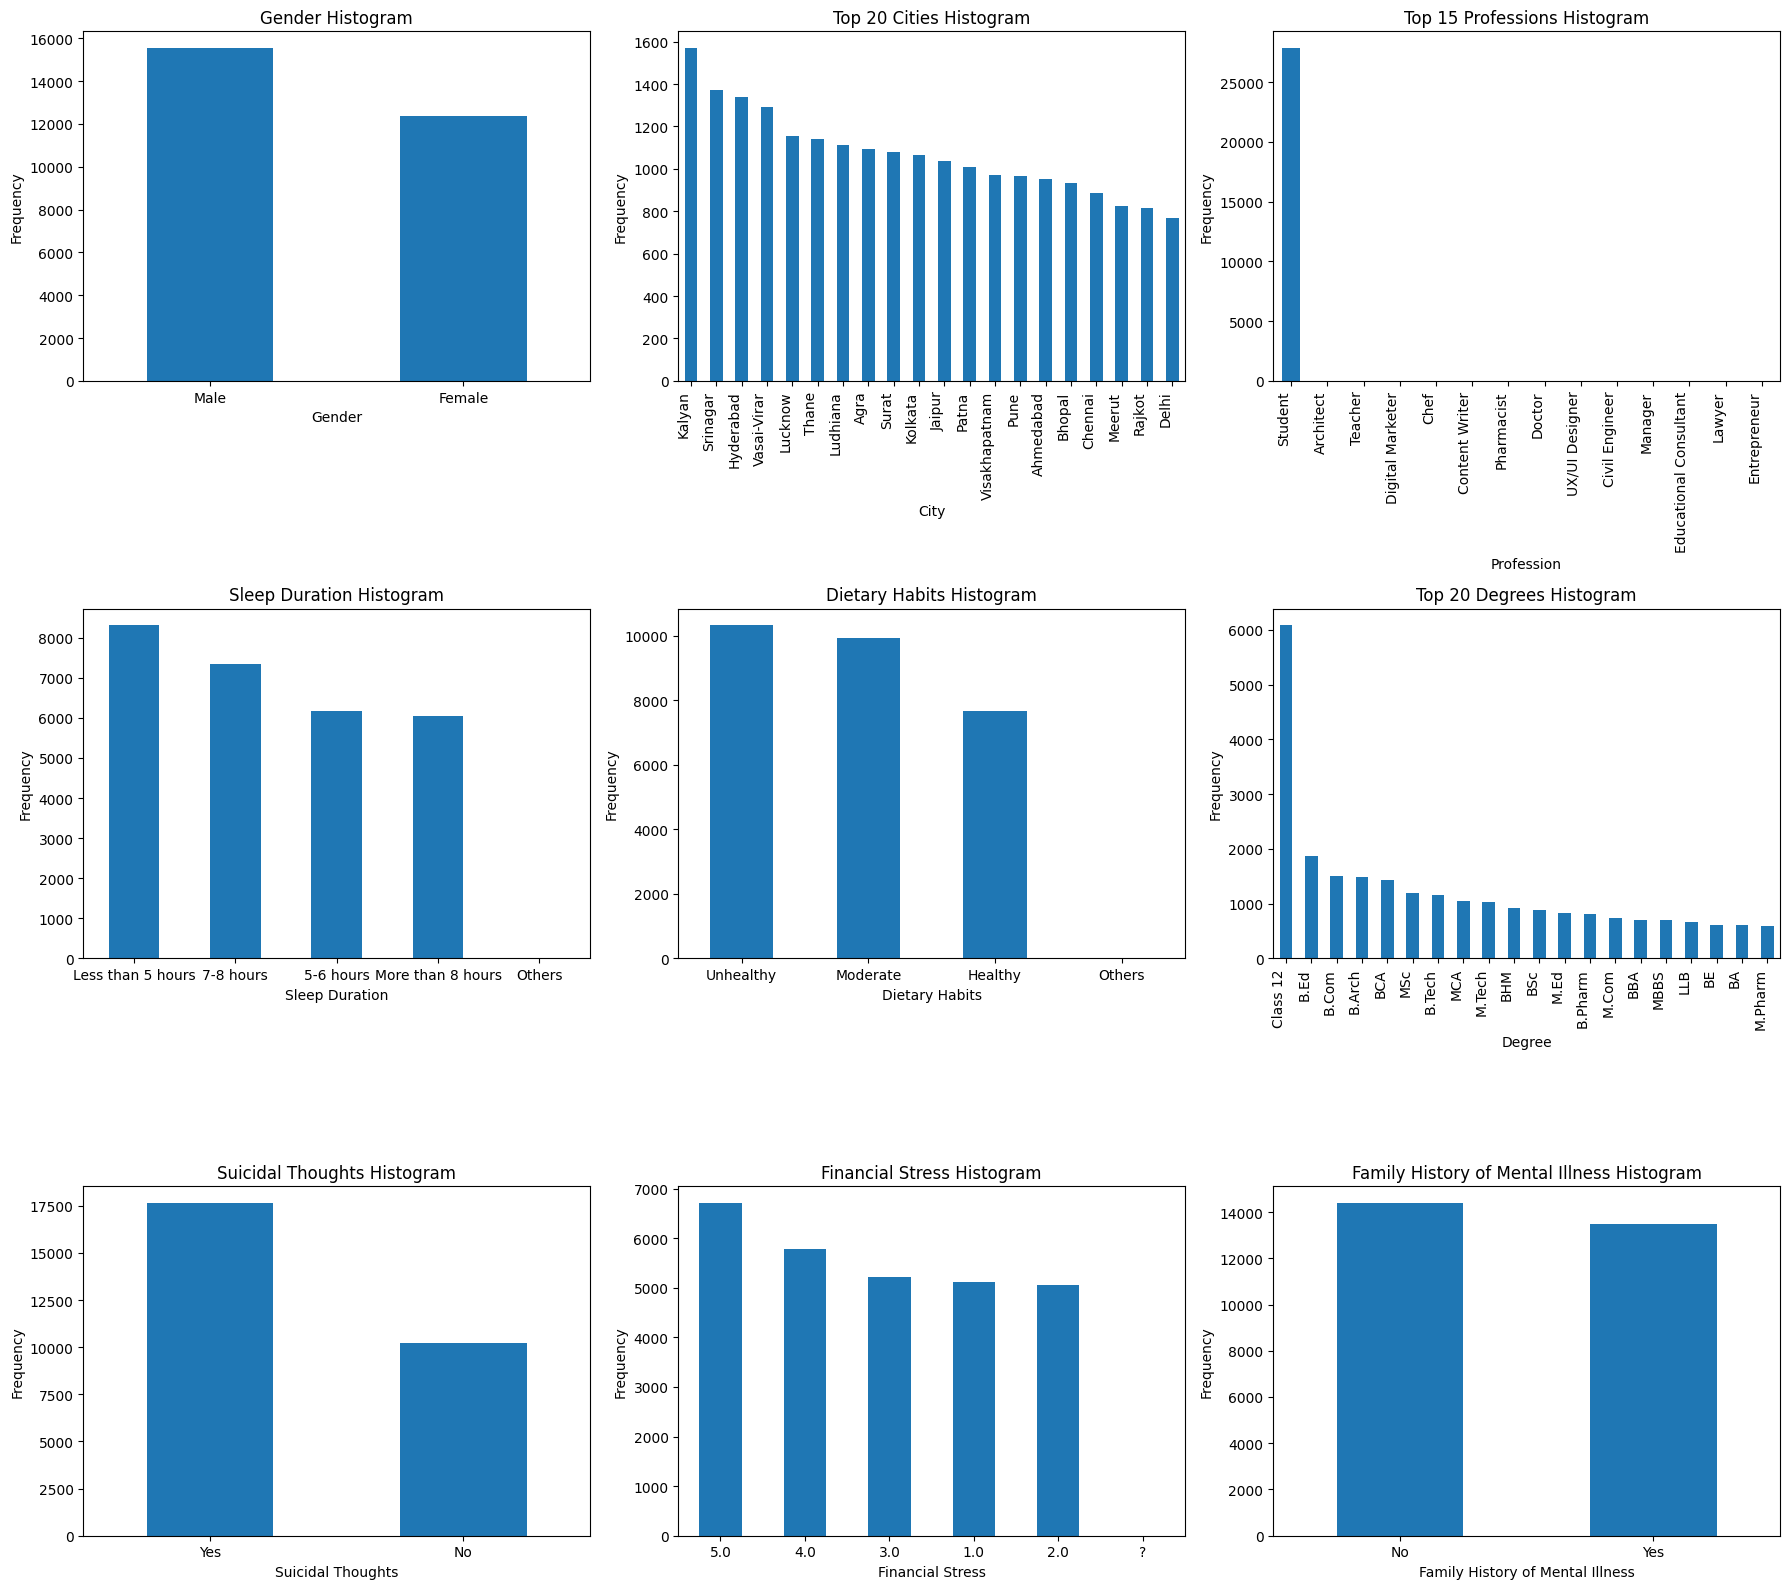

In [179]:
plt.figure(figsize=(18, 16))

# Gender
plt.subplot(3, 3, 1)
plt1 = processed['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Histogram')
plt1.set(xlabel='Gender', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=0)

# City
plt.subplot(3, 3, 2)
plt1 = processed['City'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Cities Histogram')
plt1.set(xlabel='City', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90, ha='right')

# Profession
plt.subplot(3, 3, 3)
plt1 = processed['Profession'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Professions Histogram')
plt1.set(xlabel='Profession', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90, ha='right')

# Sleep Duration
plt.subplot(3, 3, 4)
plt1 = processed['Sleep Duration'].value_counts().plot(kind='bar')
plt.title('Sleep Duration Histogram')
plt1.set(xlabel='Sleep Duration', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=0)

# Dietary Habits
plt.subplot(3, 3, 5)
plt1 = processed['Dietary Habits'].value_counts().plot(kind='bar')
plt.title('Dietary Habits Histogram')
plt1.set(xlabel='Dietary Habits', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=0)

# Degree
plt.subplot(3, 3, 6)
plt1 = processed['Degree'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Degrees Histogram')
plt1.set(xlabel='Degree', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90, ha='right')

# Suicidal Thoughts
plt.subplot(3, 3, 7)
plt1 = processed['Suicidal Thoughts'].value_counts().plot(kind='bar')
plt.title('Suicidal Thoughts Histogram')
plt1.set(xlabel='Suicidal Thoughts', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=0)

# Financial Stress
plt.subplot(3, 3, 8)
plt1 = processed['Financial Stress'].value_counts().plot(kind='bar')
plt.title('Financial Stress Histogram')
plt1.set(xlabel='Financial Stress', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=0)

# Family History of Mental Illness
plt.subplot(3, 3, 9)
plt1 = processed['Family History of Mental Illness'].value_counts().plot(kind='bar')
plt.title('Family History of Mental Illness Histogram')
plt1.set(xlabel='Family History of Mental Illness', ylabel='Frequency')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=0)


plt.tight_layout()
plt.show()


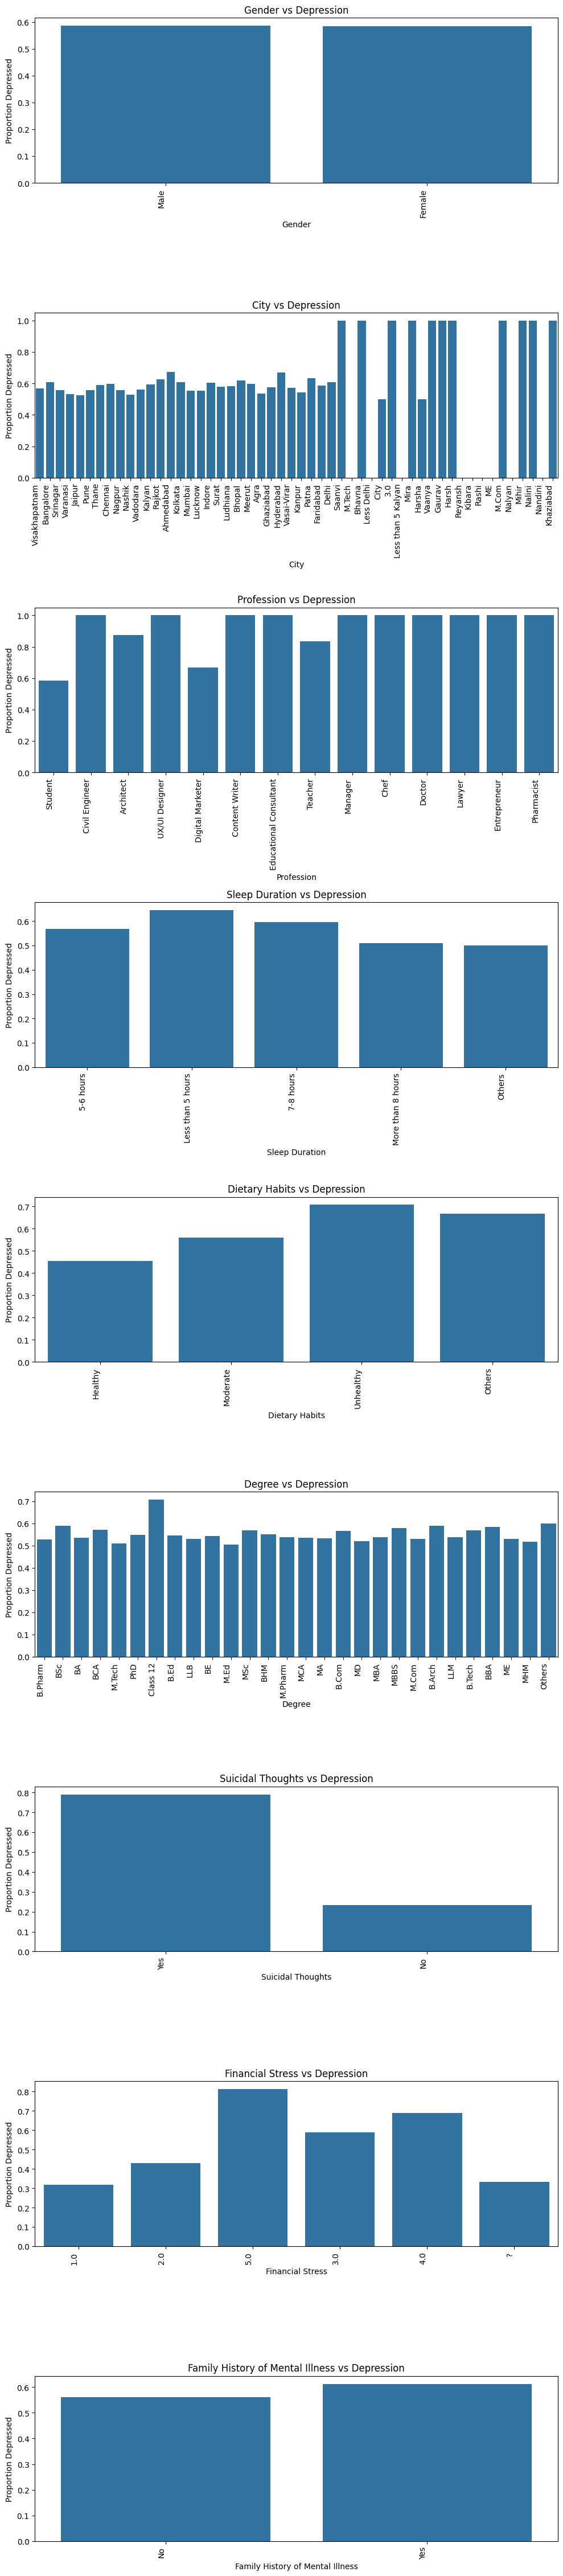

In [180]:
plt.figure(figsize=(10, 50))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(10, 1, i)
    sns.barplot(x=col, y='Depression', data=processed, errorbar=None)
    plt.title(f'{col} vs Depression')
    plt.ylabel('Proportion Depressed')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


##### 3.2. Visualizing Numerical Features.

In [181]:
numerical_features = [x for x in processed.columns if processed[x].dtype in ('int64','float64')]

In [182]:
numerical_features

['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Depression']

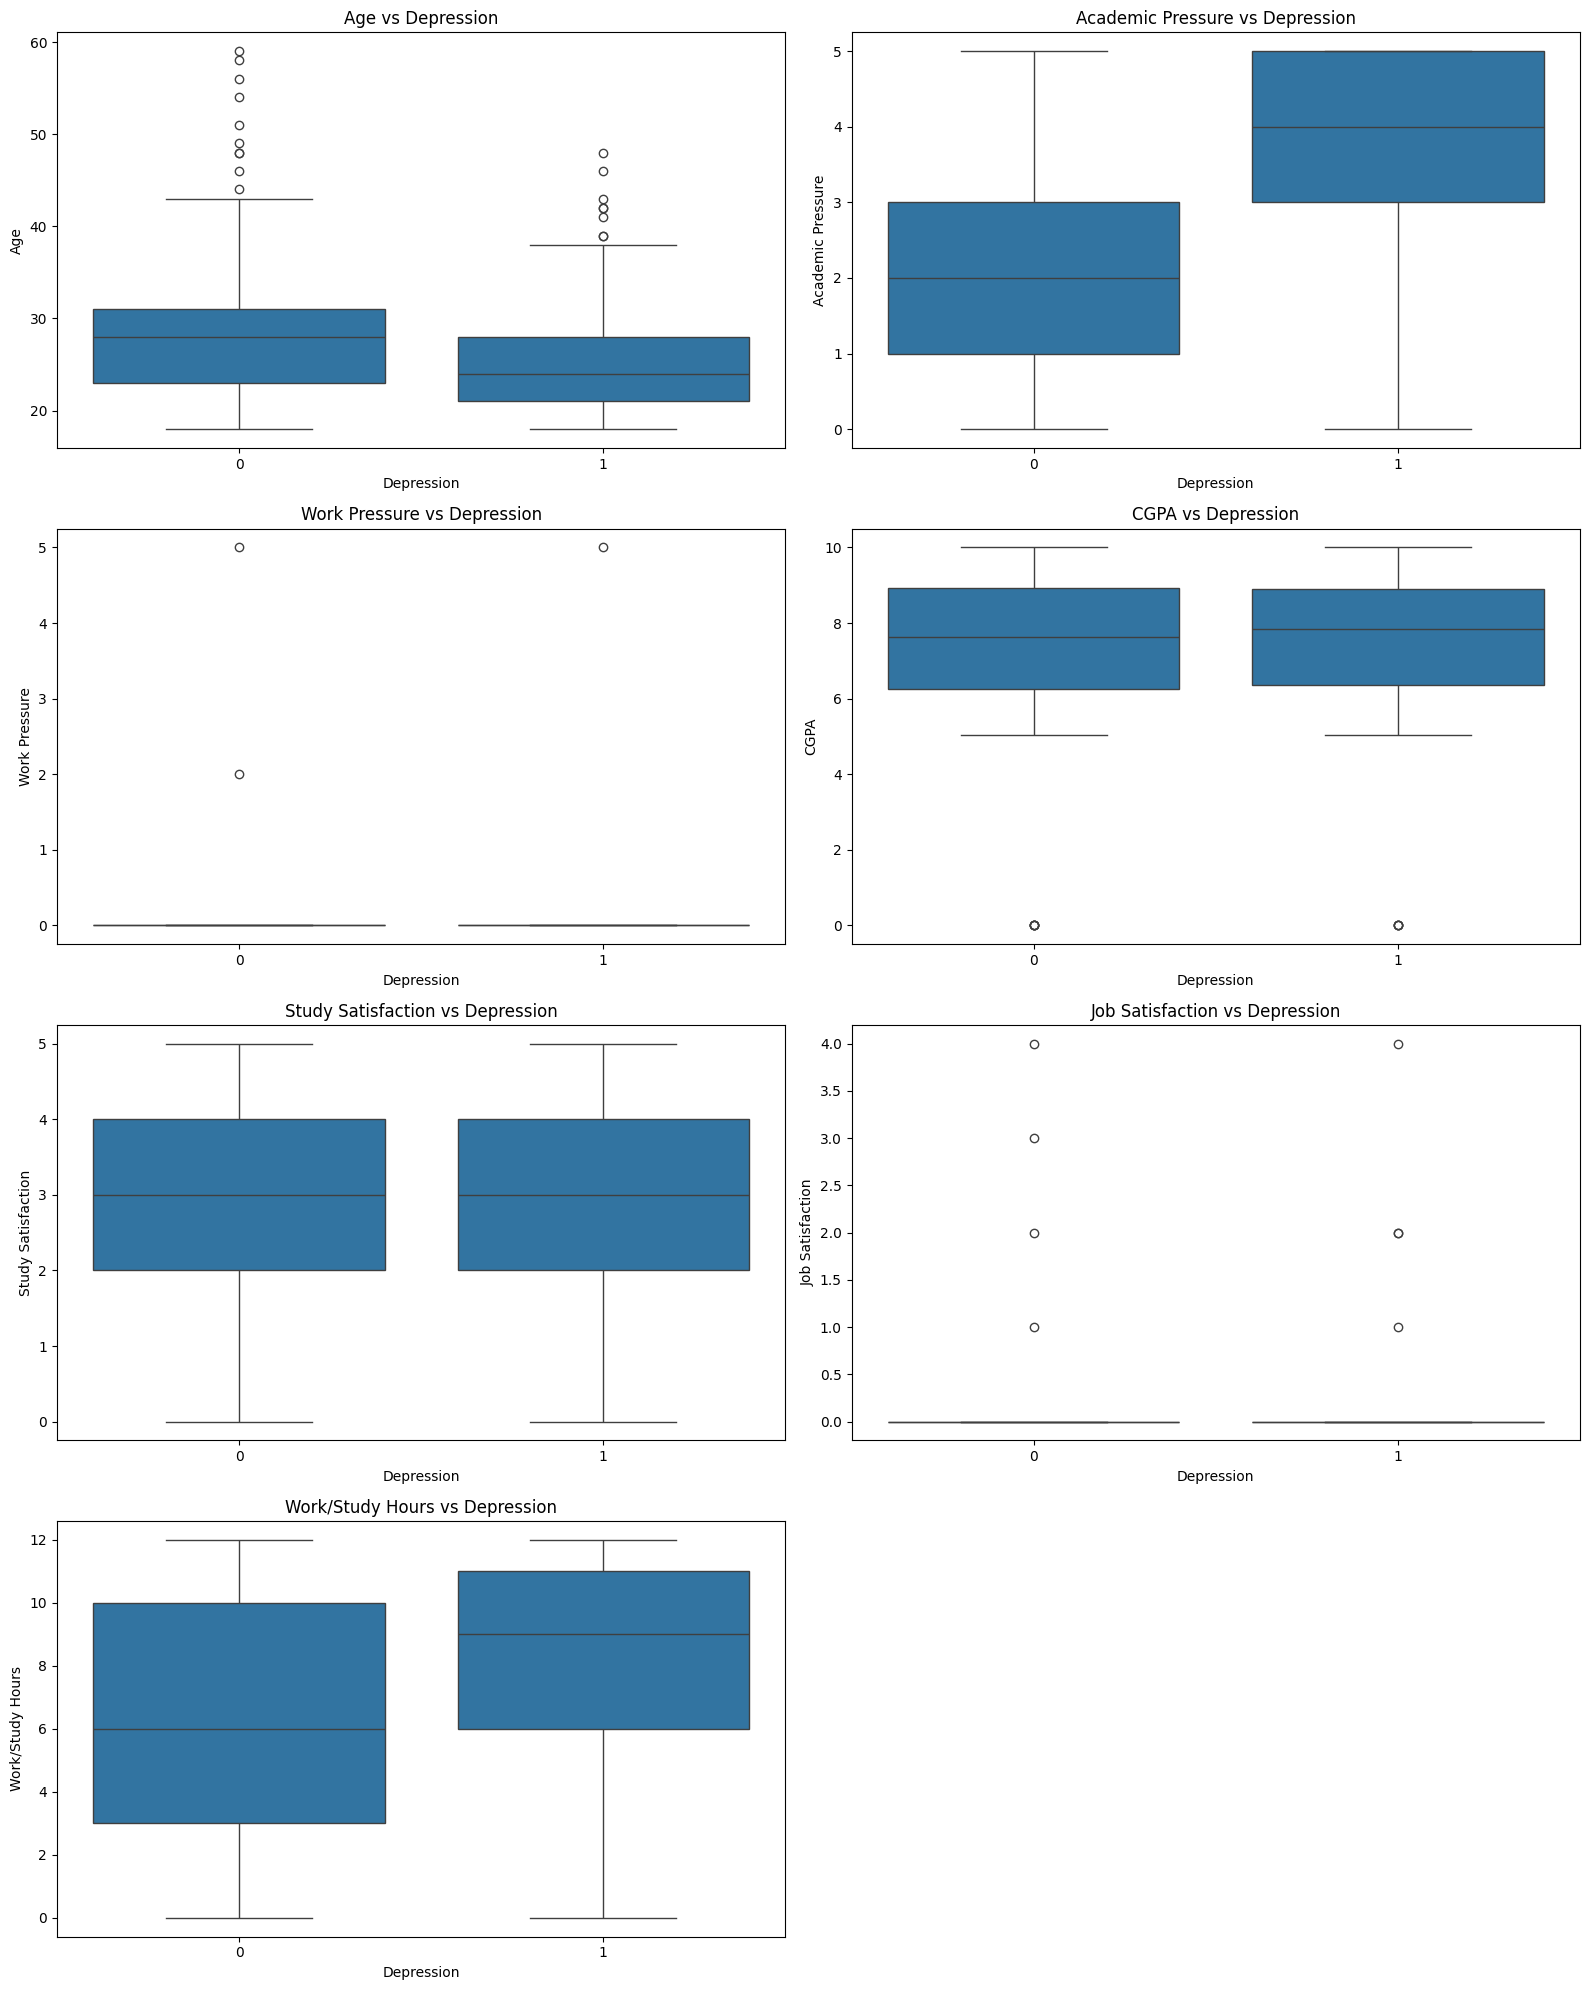

In [183]:
def boxplot(x, fig):
    plt.subplot(4, 2, fig)
    sns.boxplot(x='Depression', y=x, data=processed)
    plt.title(f'{x} vs Depression')
    plt.xlabel('Depression')
    plt.ylabel(x)

plt.figure(figsize=(16, 20))

boxplot('Age', 1)
boxplot('Academic Pressure', 2)
boxplot('Work Pressure', 3)
boxplot('CGPA', 4)
boxplot('Study Satisfaction', 5)
boxplot('Job Satisfaction', 6)
boxplot('Work/Study Hours', 7)

plt.tight_layout()
plt.show()


##### 3.3. Corrlelation Heatmap.

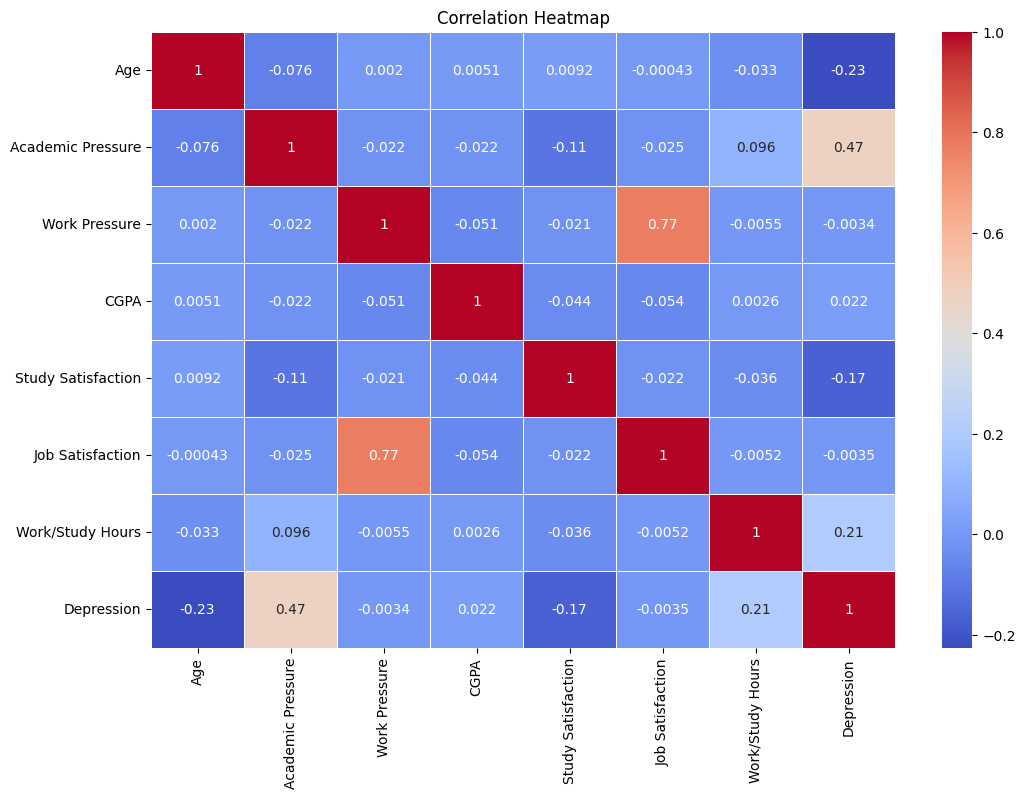

In [184]:
cor_matrix= processed[numerical_features].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 3.4. Association Chi-squared test.

In [185]:
depression = processed['Depression'].astype('category')

for col in categorical_features:
    ct = pd.crosstab(processed[col], depression )
    chi2, p, _, _ = stats.chi2_contingency(ct)
    print(col, ":\n  chi2 =", round(chi2,2), ", p =", round(p,4))

# p < 0.05 - We can assume feature is significantly associated with target Depression
# p >= 0.05 - We can assume no significant association is found with target Depression

Gender :
  chi2 = 0.08 , p = 0.7737
City :
  chi2 = 187.94 , p = 0.0
Profession :
  chi2 = 14.29 , p = 0.3539
Sleep Duration :
  chi2 = 276.85 , p = 0.0
Dietary Habits :
  chi2 = 1202.64 , p = 0.0
Degree :
  chi2 = 531.36 , p = 0.0
Suicidal Thoughts :
  chi2 = 8323.87 , p = 0.0
Financial Stress :
  chi2 = 3703.1 , p = 0.0
Family History of Mental Illness :
  chi2 = 79.43 , p = 0.0


##### 4. Data Cleaning and Feature Engineering.

##### 4.1 Removing irrelavent columns - Part 2

In [186]:
cities = processed['City'].nunique()
print(f"Number of unique values in city column: {cities}\n")

# From the section 3.1 Visualizing Ctegorical Features and the above 'cities' variable we can see so many categories/ unique values 
# for the City feature. 
# The city values are only contain cities of India. So it cannot be applied universally.
# So, we drop the 'City' column considering it as an irrelavent feature to the prediction goal.

processed.drop('City', axis=1, inplace=True)
processed.head()

Number of unique values in city column: 52



,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [187]:
# From section 3.2. Visualizing Numerical Features we can see that Job Satisfaction, Work Pressure have 
# outliers and almost all the values are same(0). Therefore due to low relevance, imprecision removed those 2 columns.
columns_to_drop = ['Job Satisfaction', 'Work Pressure']
processed.drop(columns=columns_to_drop, inplace=True)

processed.head()

,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


##### 4.2 Filtering Out Irrelevant Records

In [188]:
# In this analysis we only consider about the depression level of student.
# But during the eda, through the Top 15 professions histogram and profession vs. depression bar plot, 
# in the profession column we can see value names for professions other than students. 
# So lets see if there are any records profession is not equal to student. (Double checking)

print(processed['Profession'].unique())
print(f"\n")
print(processed['Profession'].value_counts())


['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']


Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64


In [189]:
# As there are values other than 'Student'at the moment, we have to clean rows 
# First replacing all the professions other than Student with the NaN
# The drop the rows having NaN for the profession column

processed['Profession'] = processed['Profession'].where(processed['Profession'] == 'Student', np.nan)
processed = processed.dropna(subset=['Profession'])

# Reassuring if the professions other than Student are dropped
print(processed['Profession'].value_counts())
dimensions(processed)


Profession
Student    27870
Name: count, dtype: int64
=======Dimensions of the Dataset=======
Rows: 27870
Columns: 14



In [190]:
# As now profession of all the records have the value student, we can remove that feature as it is not necessary
processed.drop('Profession', axis=1, inplace=True)

processed.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [191]:
# There is a value 'other' in both 'Sleep Duration'and 'Dietary Habits'column.
# (By analyzing the graphs of EDA) We'll consider it as a value that is not 
# relavent to the study. So we will replace those values with NaN and then 
# drop the records with NaN values in both the columns.

# Sleep Duration
print(f"====Before removing rows with value 'Others' - (Sleep Duration)====\n")
print(processed['Sleep Duration'].unique())
print(processed['Sleep Duration'].value_counts())

processed['Sleep Duration'] = processed['Sleep Duration'].replace('Others', np.nan)
processed = processed.dropna(subset=['Sleep Duration'])

print(f"\n====After removing rows with value 'Others' - (Sleep Duration)====\n")
print(processed['Sleep Duration'].value_counts())
dimensions(processed)




====Before removing rows with value 'Others' - (Sleep Duration)====

['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Sleep Duration
Less than 5 hours    8303
7-8 hours            7337
5-6 hours            6177
More than 8 hours    6035
Others                 18
Name: count, dtype: int64

====After removing rows with value 'Others' - (Sleep Duration)====

Sleep Duration
Less than 5 hours    8303
7-8 hours            7337
5-6 hours            6177
More than 8 hours    6035
Name: count, dtype: int64
=======Dimensions of the Dataset=======
Rows: 27852
Columns: 13



In [192]:
# Dietary Habits
print(f"====Before removing rows with value 'Others' - (Dietary Habits)====\n")
print(processed['Dietary Habits'].unique())
print(processed['Dietary Habits'].value_counts())

processed['Dietary Habits'] = processed['Dietary Habits'].replace('Others', np.nan)
processed = processed.dropna(subset=['Dietary Habits'])

print(f"\n====After removing rows with value 'Others' - (Dietary Habits)====\n")
print(processed['Dietary Habits'].value_counts())
dimensions(processed)

====Before removing rows with value 'Others' - (Dietary Habits)====

['Healthy' 'Moderate' 'Unhealthy' 'Others']
Dietary Habits
Unhealthy    10301
Moderate      9903
Healthy       7636
Others          12
Name: count, dtype: int64

====After removing rows with value 'Others' - (Dietary Habits)====

Dietary Habits
Unhealthy    10301
Moderate      9903
Healthy       7636
Name: count, dtype: int64
=======Dimensions of the Dataset=======
Rows: 27840
Columns: 13



In [193]:
# There is a value ? in both 'Financial Stress'column (By analyzing the graphs of EDA).
# We'll consider it as a value that is not relavent to the study. So we will replace this value with NaN and then 
# drop the rows with NaN values in the column.

print(f"====Before removing rows with value ?====\n")
print(processed['Financial Stress'].unique())
print(processed['Financial Stress'].value_counts())

processed['Financial Stress'] = processed['Financial Stress'].replace('?', np.nan)
processed = processed.dropna(subset=['Financial Stress'])

print(f"\n====After removing rows with value ?====\n")
print(processed['Financial Stress'].value_counts())
dimensions(processed)

====Before removing rows with value ?====

['1.0' '2.0' '5.0' '3.0' '4.0' '?']
Financial Stress
5.0    6698
4.0    5765
3.0    5213
1.0    5108
2.0    5053
?         3
Name: count, dtype: int64

====After removing rows with value ?====

Financial Stress
5.0    6698
4.0    5765
3.0    5213
1.0    5108
2.0    5053
Name: count, dtype: int64
=======Dimensions of the Dataset=======
Rows: 27837
Columns: 13



In [194]:
# In the age vs depression graph we can see some outlier values.
# In this depression prediction scenario, we only consider the students and younger geenration.
# By considering the above 2 facts, decided to remove the records with age >= 35

processed['Age'] = processed['Age'].where(processed['Age'] < 35, np.nan)
processed = processed.dropna(subset=['Age'])

print(f"\n==== After removing rows with Age >= 35 ====\n")
print(processed['Age'].value_counts())
dimensions(processed)


==== After removing rows with Age >= 35 ====

Age
24.0    2254
20.0    2235
28.0    2127
29.0    1946
33.0    1891
25.0    1779
21.0    1722
23.0    1637
18.0    1585
19.0    1560
34.0    1464
27.0    1459
31.0    1422
32.0    1255
22.0    1158
26.0    1152
30.0    1142
Name: count, dtype: int64
=======Dimensions of the Dataset=======
Rows: 27788
Columns: 13



##### 4.3. Encoding Features (Ordinal and Binary Encoding)

In [195]:
# Ordinal Encoding of Sleep Duration

sleep_map = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}
processed['SleepScore'] = processed['Sleep Duration'].map(sleep_map)


In [196]:
# Ordinal Encoding Dietary Habits

diet_map = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}
processed['DietScore'] = processed['Dietary Habits'].map(diet_map)	


In [197]:
processed.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,SleepScore,DietScore
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2,3
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,2,2
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,1,3
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,3,2
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,2,2


In [198]:
# Dropping the unwanted original columns
processed.drop(columns=['Sleep Duration', 'Dietary Habits'], inplace=True)

In [199]:
processed.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Degree', 'Suicidal Thoughts', 'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression', 'SleepScore',
       'DietScore'],
      dtype='object')

In [200]:
# As both the Suicidal Thoughts and Family History of Mental Illness columns have only yes or no values (according to the EDA) 
# we encode both of these columns using binary encoding

processed['Suicidal Thoughts'] = processed['Suicidal Thoughts'].map({'Yes': 1, 'No': 0})

processed['Family History of Mental Illness'] = processed['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})


In [201]:
print(f"\n==Value counts before cleaning - Degree==")
print(processed['Degree'].value_counts())

# We can see so many unique values for the 'Degree' feature. This can lead to poor splits and the overfitting of the model.
# So here we will only take top 10 degrees and wil categorize rare degrees into 'Other' category.

top_Degrees = processed['Degree'].value_counts().nlargest(10).index
processed['Degree_Cleaned'] = processed['Degree'].apply(lambda x:x if x in top_Degrees else 'Other')

print(f"\n==Value counts after cleaning - Degree==")
print(processed['Degree_Cleaned'].value_counts())

processed.drop('Degree', axis=1, inplace=True)



==Value counts before cleaning - Degree==
Degree
Class 12    6067
B.Ed        1859
B.Com       1502
B.Arch      1473
BCA         1430
MSc         1183
B.Tech      1151
MCA         1036
M.Tech      1019
BHM          921
BSc          879
M.Ed         817
B.Pharm      808
M.Com        730
BBA          695
MBBS         689
LLB          669
BE           610
BA           596
M.Pharm      579
MD           567
MBA          561
MA           542
PhD          514
LLM          481
MHM          191
ME           184
Others        35
Name: count, dtype: int64

==Value counts after cleaning - Degree==
Degree_Cleaned
Other       10147
Class 12     6067
B.Ed         1859
B.Com        1502
B.Arch       1473
BCA          1430
MSc          1183
B.Tech       1151
MCA          1036
M.Tech       1019
BHM           921
Name: count, dtype: int64


In [202]:
processed.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,SleepScore,DietScore,Degree_Cleaned
0,Male,33.0,5.0,8.97,2.0,1,3.0,1.0,0,1,2,3,Other
1,Female,24.0,2.0,5.90,5.0,0,3.0,2.0,1,0,2,2,Other
2,Male,31.0,3.0,7.03,5.0,0,9.0,1.0,1,0,1,3,Other
3,Female,28.0,3.0,5.59,2.0,1,4.0,5.0,1,1,3,2,BCA
4,Female,25.0,4.0,8.13,3.0,1,1.0,1.0,0,0,2,2,M.Tech


In [204]:
output_dir = "Data/processed/FC110572_MethuliMenya"
os.makedirs(output_dir, exist_ok=True)
processed.to_csv(os.path.join(output_dir, "preprocessed_data.csv"), index=False)